In [1]:
# In a new code cell for Step 1.2
from google.colab import drive
drive.mount('/content/drive')
# Run this cell (Shift + Enter) and follow the authorization prompts.

Mounted at /content/drive


In [2]:
import os

# Define the base path to your project folder in Google Drive.
# IMPORTANT: This must exactly match the path where you uploaded your 'EC_LoRA_T_Project2' folder!
PROJECT_ROOT_DIR = '/content/drive/MyDrive/EC_LoRA_T_Project2' # Corrected folder name

# Check if the project root directory exists
if os.path.exists(PROJECT_ROOT_DIR):
    print(f"Project root '{PROJECT_ROOT_DIR}' exists.")
    print("\nContents of your project root directory:")
    for item in os.listdir(PROJECT_ROOT_DIR):
        print(f"- {item}")
else:
    # If the root doesn't exist, something is wrong with the path or Drive mounting.
    raise FileNotFoundError(f"Error: Project root '{PROJECT_ROOT_DIR}' does not exist. "
                            "Please check your Google Drive path and ensure Step 1.2 was successful.")

# Define paths to your specific data folders within the project root
# Note: At this stage, your 'huggingface_dataset' folder might not exist yet if you haven't run
# the data preparation steps (Steps 2-4 in our previous conversation). This check is anticipatory.
HF_DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, 'huggingface_dataset')

# This is the base directory containing your influencer's image folders (e.g., 'sungccess/').
# The structure is assumed to be `INFLUENCER_DATA_ROOT / [shortcode] / [image_filename].jpg`
INFLUENCER_DATA_ROOT = os.path.join(PROJECT_ROOT_DIR, 'sungccess') # Corrected influencer name

print("\nChecking specific data paths:")
# For HF_DATASET_PATH, we'll only check existence later when we expect it to be created.
# For now, we only need INFLUENCER_DATA_ROOT to exist.
if not os.path.exists(INFLUENCER_DATA_ROOT):
    raise FileNotFoundError(f"Error: Influencer Data Root '{INFLUENCER_DATA_ROOT}' does not exist. "
                            "Make sure your 'sungccess' folder is correctly uploaded inside 'EC_LoRA_T_Project2'.")

print(f"Influencer Data Root exists: {os.path.exists(INFLUENCER_DATA_ROOT)}")
# We will check HF_DATASET_PATH existence after it's generated.

Project root '/content/drive/MyDrive/EC_LoRA_T_Project2' exists.

Contents of your project root directory:
- add_image_column.py
- sungccess
- sungccess_master_metadata.csv
- sungccess_master_metadata_enriched.csv
- huggingface_dataset
- ec_lora_t_model_output

Checking specific data paths:
Influencer Data Root exists: True


In [3]:
# In a new code cell for Step 2.1 (ULTIMATE, DEFINITIVE FIX FOR PYTORCH INSTALLATION)

# IMPORTANT: Ensure a clean PyTorch/Torchvision installation compatible with Colab's CUDA version.
print("Uninstalling existing torch and torchvision to prevent conflicts...")
!pip uninstall -y torch torchvision torchaudio

# Get the CUDA version from Colab's environment
cuda_version = !nvcc --version | grep "release" | awk '{print $NF}' | cut -d',' -f1

# Extract and clean CUDA version string for URL determination
# Example: 'V12.5.82' -> '12.5.82' -> '121' for cu121
cuda_version_str_raw = cuda_version[0].replace('V', '') # Remove 'V' prefix (e.g., "12.5.82")

cuda_version_for_url = None
if cuda_version_str_raw.startswith('12.'):
    cuda_version_for_url = 'cu121' # For CUDA 12.x, cu121 is the standard PyTorch wheel index
elif cuda_version_str_raw.startswith('11.'):
    cuda_version_for_url = 'cu118' # For CUDA 11.x, cu118 is the standard PyTorch wheel index

print(f"Detected CUDA version: {cuda_version[0]}.")

if cuda_version_for_url:
    print(f"Attempting to install PyTorch for CUDA {cuda_version[0]} (forcing {cuda_version_for_url} wheel).")
    !pip install -qqq torch torchvision torchaudio --index-url https://download.pytorch.org/whl/{cuda_version_for_url}
else:
    print(f"ERROR: Could not determine specific PyTorch wheel for CUDA version {cuda_version[0]}.")
    print("Attempting to install default PyTorch wheels (may be CPU-only or incompatible).")
    !pip install -qqq torch torchvision torchaudio

# Now install core libraries for Stable Diffusion and LoRA.
print("Installing core AI/ML libraries (diffusers, transformers, peft, accelerate, datasets)...")
!pip install -qqq diffusers transformers peft accelerate datasets

# Install bitsandbytes for 8-bit optimization (optional, but good for memory efficiency)
print("Installing bitsandbytes for 8-bit optimization...")
!pip install -qqq bitsandbytes

# Install Pillow (image processing) and scikit-learn (data utilities)
print("Installing Pillow (image processing) and scikit-learn (data utilities)...")
!pip install -qqq Pillow scikit-learn

print("\nAll necessary libraries installed successfully!")
print("Please **RESTART RUNTIME** (Runtime -> Restart runtime) after this cell to ensure all changes take effect.")

Uninstalling existing torch and torchvision to prevent conflicts...
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Detected CUDA version: V12.5.82.
Attempting to install PyTorch for CUDA V12.5.82 (forcing cu121 wheel).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 126.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [7]:
# In a new code cell for Step 2.2
from huggingface_hub import login
import os

# It's best practice to store sensitive tokens securely, like in Colab Secrets or environment variables.
# For simplicity in this guide, `login()` will prompt you to paste your token.
# Ensure you have your Hugging Face User Access Token ready (it should have a 'write' role).

login()

print("Hugging Face login process initiated. Please paste your token when prompted.")

Hugging Face login process initiated. Please paste your token when prompted.


In [8]:
# In a new code cell for Step 2.3
from datasets import load_from_disk
import os

# IMPORTANT: Ensure these paths match what was defined in Step 1.3
PROJECT_ROOT_DIR = '/content/drive/MyDrive/EC_LoRA_T_Project2' # Corrected
HF_DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, 'huggingface_dataset')
INFLUENCER_DATA_ROOT = os.path.join(PROJECT_ROOT_DIR, 'sungccess') # Corrected

print(f"Project Root Directory: {PROJECT_ROOT_DIR}")
print(f"Hugging Face Dataset Path: {HF_DATASET_PATH}")
print(f"Influencer Data Root Path (for image loading): {INFLUENCER_DATA_ROOT}")

# Verify paths exist before attempting to load
if not os.path.exists(PROJECT_ROOT_DIR):
    raise FileNotFoundError(f"Error: PROJECT_ROOT_DIR '{PROJECT_ROOT_DIR}' does not exist. Please check your Google Drive path and mounting.")
# Note: HF_DATASET_PATH and INFLUENCER_DATA_ROOT should ideally exist if you followed previous data prep steps.
if not os.path.exists(HF_DATASET_PATH):
    print(f"Warning: Hugging Face Dataset path '{HF_DATASET_PATH}' does not exist. "
          "This is expected if you haven't run the data preparation steps (our previous Steps 2, 3, 4) yet for this session.")
    # We will not raise an error here, but proceed with a warning, as load_from_disk will raise its own if path is invalid.
if not os.path.exists(INFLUENCER_DATA_ROOT):
    raise FileNotFoundError(f"Error: INFLUENCER_DATA_ROOT '{INFLUENCER_DATA_ROOT}' does not exist. Make sure your influencer image folders are correctly uploaded.")


print("\nAttempting to load the Hugging Face Dataset...")
try:
    # Load the dataset. Expected columns from our data prep: 'image', 'full_caption',
    # 'normalized_engagement', 'normalized_time'.
    engagement_dataset = load_from_disk(HF_DATASET_PATH)
    print("Hugging Face Dataset loaded successfully!")
    print(f"Dataset structure: {engagement_dataset}")
    print(f"First few entries of the dataset:\n{engagement_dataset[0]}")
    # Verify expected columns
    expected_cols = ['image', 'full_caption', 'normalized_engagement', 'normalized_time']
    if not all(col in engagement_dataset.column_names for col in expected_cols):
        print(f"WARNING: Dataset missing some expected columns. Expected: {expected_cols}, Found: {engagement_dataset.column_names}")

except Exception as e:
    print(f"Error loading dataset from {HF_DATASET_PATH}: {e}")
    print("Please ensure: 1) The path is correct. 2) The dataset was saved properly by running our previous data preparation steps (Steps 2, 3, 4).")
    engagement_dataset = None # Set to None to indicate failure

Project Root Directory: /content/drive/MyDrive/EC_LoRA_T_Project2
Hugging Face Dataset Path: /content/drive/MyDrive/EC_LoRA_T_Project2/huggingface_dataset
Influencer Data Root Path (for image loading): /content/drive/MyDrive/EC_LoRA_T_Project2/sungccess

Attempting to load the Hugging Face Dataset...
Hugging Face Dataset loaded successfully!
Dataset structure: Dataset({
    features: ['image', 'full_caption', 'normalized_engagement', 'normalized_time'],
    num_rows: 273
})
First few entries of the dataset:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1350 at 0x7C13623E98D0>, 'full_caption': '(sungccess style) a man wearing a black hoodie and jeans (fall)', 'normalized_engagement': 0.0949888676404953, 'normalized_time': 0.19054053723812103}


In [9]:
# In a new code cell for Step 2.4
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
import torch

# Define the model ID for Stable Diffusion v1.5
MODEL_ID = "runwayml/stable-diffusion-v1-5"

# 1. Load the tokenizer and text encoder for text conditioning
print(f"Loading Tokenizer from {MODEL_ID}...")
tokenizer = CLIPTokenizer.from_pretrained(MODEL_ID, subfolder="tokenizer")
print(f"Loading Text Encoder from {MODEL_ID}...")
text_encoder = CLIPTextModel.from_pretrained(MODEL_ID, subfolder="text_encoder", torch_dtype=torch.float32)

# 2. Load the VAE (Variational Autoencoder) for image encoding/decoding
print(f"Loading VAE from {MODEL_ID}...")
vae = AutoencoderKL.from_pretrained(MODEL_ID, subfolder="vae", torch_dtype=torch.float32)

# 3. Load the UNet model (the core noise predictor)
print(f"Loading UNet from {MODEL_ID}...")
unet = UNet2DConditionModel.from_pretrained(MODEL_ID, subfolder="unet", torch_dtype=torch.float32)

# 4. Load the noise scheduler (determines how noise is added/removed during diffusion)
print(f"Loading Noise Scheduler from {MODEL_ID}...")
noise_scheduler = DDPMScheduler.from_pretrained(MODEL_ID, subfolder="scheduler", num_train_timesteps=1000, prediction_type="epsilon", num_channels=4)
# Explicitly setting num_channels=4 to align with VAE output, in case of internal scheduler misinterpretation.
# Also explicitly set num_train_timesteps and prediction_type for clarity.

# Move VAE and Text Encoder to GPU and set them to evaluation mode
# (Their weights are frozen during LoRA training, so no gradients are needed)
vae.to("cuda")
text_encoder.to("cuda")
vae.eval() # Set to evaluation mode
text_encoder.eval() # Set to evaluation mode

# The UNet will be moved to GPU as part of its custom LoRA injection in Part 4,
# and its trainable parts (our EC_LoraLinear layers) will have gradients enabled.
# Base UNet weights will be frozen.

print("\nAll Stable Diffusion components loaded successfully to GPU!")
print(f"Loaded UNet parameters: {sum(p.numel() for p in unet.parameters()):,}")
# At the very end of Step 2.4
print(f"UNet's current dtype: {unet.dtype}") # <-- ADD THIS LINE

Loading Tokenizer from runwayml/stable-diffusion-v1-5...
Loading Text Encoder from runwayml/stable-diffusion-v1-5...
Loading VAE from runwayml/stable-diffusion-v1-5...
Loading UNet from runwayml/stable-diffusion-v1-5...
Loading Noise Scheduler from runwayml/stable-diffusion-v1-5...

All Stable Diffusion components loaded successfully to GPU!
Loaded UNet parameters: 859,520,964
UNet's current dtype: torch.float32


In [10]:
# In a new code cell for Step 3.1

from torchvision import transforms
from PIL import Image
import numpy as np
import torch

# Define image transformations
# Stable Diffusion v1.5 typically works with 512x512 images.
# We will explicitly set image_size to 512 to train on standard resolution images
# that the VAE is designed for, aligning with your goal for higher quality output.
# IMPORTANT: Training at 512x512 requires more GPU VRAM than 64x64 pixel inputs.
def make_train_transforms(image_size=512): # Changed default to 512 for standard SD training
    return transforms.Compose([
        transforms.Resize(image_size, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(image_size), # Use CenterCrop for consistency with most SD training setups
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ])

# Instantiate the training transforms for 512x512 pixel images.
train_transforms = make_train_transforms(image_size=512) # Explicitly use 512
print(f"Image transformations defined for target size: 512x512 (pixel resolution)")

# Text Tokenization function
def tokenize_captions(captions, tokenizer, max_length=tokenizer.model_max_length):
    return tokenizer(
        captions,
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    ).input_ids

print(f"Text tokenization function defined. Max length for captions: {tokenizer.model_max_length}")

Image transformations defined for target size: 512x512 (pixel resolution)
Text tokenization function defined. Max length for captions: 77


In [11]:
# In a new code cell for Step 3.2

from torch.utils.data import Dataset
from PIL import Image
import torch
import os
# No longer strictly need 'ast' for the new engagement_time_vector format, but keeping it doesn't hurt.

class ECLoRATDataset(Dataset):
    def __init__(self, hf_dataset, tokenizer, image_transforms, text_max_length=None):
        """
        Initializes the custom dataset.

        Args:
            hf_dataset (datasets.Dataset): The Hugging Face dataset loaded from disk (from Step 2.3).
                                          This dataset already contains 'image' (PIL Image),
                                          'full_caption', 'normalized_engagement', 'normalized_time'.
            tokenizer (transformers.CLIPTokenizer): The tokenizer for text captions (from Step 2.4).
            image_transforms (torchvision.transforms.Compose): Image transformations to apply (from Step 3.1).
            text_max_length (int, optional): Max length for text tokenization. Defaults to tokenizer.model_max_length.
        """
        self.hf_dataset = hf_dataset
        # self.image_root_dir is no longer needed as hf_dataset directly loads the image
        self.tokenizer = tokenizer
        self.image_transforms = image_transforms
        self.text_max_length = text_max_length if text_max_length is not None else tokenizer.model_max_length

        print(f"ECLoRATDataset initialized with {len(self.hf_dataset)} samples.")
        # print(f"Image root directory: {self.image_root_dir}") # This line can be removed

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        item = self.hf_dataset[idx]

        # 1. Load and Transform Image
        # The Hugging Face dataset's 'image' feature already loads the PIL Image directly.
        image = item['image']
        # The 'image_path' can still be retrieved for debugging/logging from the dataset if needed,
        # but it's not strictly necessary for loading the image itself here.
        # If your HF dataset *also* stored the path (which it did in our Step 4), you can get it.
        # For simplicity, we'll assume the 'image' feature is the PIL Image itself.
        if not isinstance(image, Image.Image):
             # This means the 'image' feature might still be a path string, or corrupted.
             # This fallback should ideally not be hit if HF dataset was created correctly with Image() feature.
             try:
                 image = Image.open(item['image']).convert('RGB')
             except Exception as e:
                 print(f"Error: Item {idx} 'image' is not PIL Image and cannot be opened from path '{item['image']}'. Error: {e}")
                 return None

        try:
            pixel_values = self.image_transforms(image)
        except Exception as e:
            print(f"Error transforming image for item {idx}: {e}. Skipping.")
            return None

        # 2. Tokenize Caption
        # Use 'full_caption' from the pre-processed dataset
        caption_text = str(item['full_caption'])
        # tokenize_captions expects a list, so wrap it
        input_ids = tokenize_captions([caption_text], self.tokenizer, self.text_max_length)[0]

        # 3. Extract Engagement & Time Vector
        # Combine normalized_engagement and normalized_time into a single tensor
        normalized_engagement = item['normalized_engagement']
        normalized_time = item['normalized_time']
        engagement_time_vector = torch.tensor([normalized_engagement, normalized_time], dtype=torch.float32)

        return {
            "pixel_values": pixel_values,
            "input_ids": input_ids,
            "engagement_time_vector": engagement_time_vector,
            "full_caption": caption_text, # Return the full_caption for debugging/inspection
            # "image_path": item['image_path'] # Include if image_path is still desired from HF dataset
        }

    # Custom collate function remains largely the same, as it operates on the returned dictionary
    def collate_fn(self, batch):
        batch = list(filter(lambda x: x is not None, batch))

        if not batch:
            return None

        pixel_values = torch.stack([x["pixel_values"] for x in batch])
        input_ids = torch.stack([x["input_ids"] for x in batch])
        engagement_time_vectors = torch.stack([x["engagement_time_vector"] for x in batch])

        # Change key name from 'original_caption' to 'full_caption' for consistency
        full_captions = [x["full_caption"] for x in batch]
        # image_paths = [x["image_path"] for x in batch] # Uncomment if you want to include image_path

        return {
            "pixel_values": pixel_values,
            "input_ids": input_ids,
            "engagement_time_vector": engagement_time_vectors,
            "full_caption": full_captions,
            # "image_path": image_paths # Uncomment if you want to include image_path
        }


# Instantiate the dataset
# IMPORTANT: Remove image_root_dir argument from instantiation
training_dataset = ECLoRATDataset(
    hf_dataset=engagement_dataset,       # From Step 2.3
    tokenizer=tokenizer,                 # From Step 2.4
    image_transforms=train_transforms    # From Step 3.1
)

print("\nCustom ECLoRATDataset created. Let's try fetching a sample item:")
# Test fetching an item to check if it works
try:
    sample_item = training_dataset[0]
    if sample_item:
        print(f"Sample item loaded successfully! Keys: {sample_item.keys()}")
        print(f"Pixel values shape: {sample_item['pixel_values'].shape}")
        print(f"Input IDs shape: {sample_item['input_ids'].shape}")
        print(f"Engagement Time Vector: {sample_item['engagement_time_vector']}")
        print(f"Full Caption: {sample_item['full_caption']}") # Changed key name
        # If you uncommented image_path in __getitem__ and collate_fn, uncomment here too:
        # print(f"Image Path: {sample_item['image_path']}")
    else:
        print("First item was None, indicating a loading error. Check data integrity.")
except Exception as e:
    print(f"Error fetching sample item from dataset: {e}")
    print("Please ensure your dataset is loaded correctly in Step 2.3 and column names are accurate.")

ECLoRATDataset initialized with 273 samples.

Custom ECLoRATDataset created. Let's try fetching a sample item:
Sample item loaded successfully! Keys: dict_keys(['pixel_values', 'input_ids', 'engagement_time_vector', 'full_caption'])
Pixel values shape: torch.Size([3, 512, 512])
Input IDs shape: torch.Size([77])
Engagement Time Vector: tensor([0.0950, 0.1905])
Full Caption: (sungccess style) a man wearing a black hoodie and jeans (fall)


In [12]:
# In a new code cell for Step 3.3

from torch.utils.data import DataLoader

# Define training parameters for the DataLoader
BATCH_SIZE = 4 # Adjust based on your GPU memory. Start small (e.g., 4 or 8).
NUM_WORKERS = 4 # Number of subprocesses to use for data loading.

# Create the DataLoader
train_dataloader = DataLoader(
    training_dataset,
    shuffle=True,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    collate_fn=training_dataset.collate_fn,
    pin_memory=True
)

print(f"DataLoader created with batch size: {BATCH_SIZE} and {NUM_WORKERS} workers.")
print(f"Total batches per epoch: {len(train_dataloader)}")

# Let's try fetching one batch to ensure it works correctly
print("\nAttempting to fetch a sample batch from DataLoader...")
try:
    sample_batch = next(iter(train_dataloader))
    if sample_batch is not None:
        print(f"Sample batch loaded successfully! Keys: {sample_batch.keys()}")
        print(f"Pixel values batch shape: {sample_batch['pixel_values'].shape} (Batch, Channels, Height, Width)")
        print(f"Input IDs batch shape: {sample_batch['input_ids'].shape} (Batch, Sequence Length)")
        print(f"Engagement Time Vector batch shape: {sample_batch['engagement_time_vector'].shape} (Batch, Vector Length)")
        # Corrected key name from 'original_caption' to 'full_caption'
        print(f"First caption in batch: {sample_batch['full_caption'][0]}")
    else:
        print("Sample batch was None. This could happen if your dataset returned only None items for the first batch, or if it's empty.")
except Exception as e:
    print(f"Error fetching sample batch from DataLoader: {e}")
    print("Check your dataset class and collate_fn for issues, or if data is truly available.")

DataLoader created with batch size: 4 and 4 workers.
Total batches per epoch: 69

Attempting to fetch a sample batch from DataLoader...
Sample batch loaded successfully! Keys: dict_keys(['pixel_values', 'input_ids', 'engagement_time_vector', 'full_caption'])
Pixel values batch shape: torch.Size([4, 3, 512, 512]) (Batch, Channels, Height, Width)
Input IDs batch shape: torch.Size([4, 77]) (Batch, Sequence Length)
Engagement Time Vector batch shape: torch.Size([4, 2]) (Batch, Vector Length)
First caption in batch: (sungccess style) a man sitting on a white bench with a black hat (summer)


In [13]:
# In a new code cell for Step 4.0 (ULTIMATE DIAGNOSTIC REVISION)

import torch.nn as nn
import re
# Import Conv1D as these are commonly used in diffusers UNets for attention projections
from transformers.pytorch_utils import Conv1D

# Ensure UNet is in training mode. This is important for enabling LoRA layers
# even though the base weights will be frozen.
unet.train()

print("Freezing base UNet parameters...")
for param in unet.parameters():
    param.requires_grad = False
print("Base UNet parameters frozen.")

# Identify target layers for LoRA injection.
# These patterns are based on typical Stable Diffusion UNet structures.
# We will use the ultimate diagnostic output to confirm and refine these patterns if needed.
target_linear_module_patterns = [
    "to_q",    # Query projection
    "to_k",    # Key projection
    "to_v",    # Value projection
    "to_out",  # Attention output projection (might have .0 suffix, or not)
    "ff.net.0.proj", # Feed-forward network first linear
    "ff.net.2"       # Feed-forward network second linear
]

trainable_lora_modules_info = [] # This list will store (full_module_name, original_module_instance) for actual LoRA targets
all_linear_conv1d_modules_found = []    # NEW: For comprehensive diagnosis of all Linear/Conv1D modules

print("Identifying target Linear/Conv1D layers for custom LoRA injection...")
# First pass: Collect all nn.Linear and Conv1D modules, and apply initial pattern matching
for name, module in unet.named_modules():
    if isinstance(module, (nn.Linear, Conv1D)): # Check for both types
        all_linear_conv1d_modules_found.append(name) # Add to our comprehensive diagnostic list
        for pattern in target_linear_module_patterns:
            # We use `in name` instead of `endswith` here for a broader initial check,
            # but then for `trainable_lora_modules_info` we ensure it's a specific end.
            if name.endswith(pattern):
                trainable_lora_modules_info.append((name, module))
                break # Move to the next module once a pattern is matched

# --- ULTIMATE DIAGNOSTIC PRINT START ---
# This section will list ALL identified Linear/Conv1D modules and also attempt to print types
# for modules whose names contain common attention/FF keywords.
print("\n--- ULTIMATE DIAGNOSTIC: All nn.Linear/Conv1D modules and types of potential LoRA targets ---")
print("\n--- All nn.Linear/Conv1D modules found in UNet's named_modules(): ---")
for ln_name in all_linear_conv1d_modules_found:
    print(f"- {ln_name}")
print("--- End All nn.Linear/Conv1D modules ---\n")

print("--- Detailed types of modules containing common attention/FF keywords: ---")
potential_keyword_patterns = ["to_q", "to_k", "to_v", "to_out", "ff.net", "proj", "linear", "conv"]
found_potential_targets_details = []

for name, module in unet.named_modules():
    for pattern in potential_keyword_patterns:
        if pattern in name: # Check if pattern is anywhere in the module's full name
            # Only add if it's a direct nn.Module instance, not just a container
            if isinstance(module, nn.Module):
                found_potential_targets_details.append((name, type(module)))
                break # Move to next module once a pattern is found

if not found_potential_targets_details:
    print("No modules found containing common LoRA target keywords (q,k,v,out,ff.net,proj,linear,conv). This is highly unusual.")
else:
    # Sort for easier readability
    found_potential_targets_details.sort(key=lambda x: x[0])
    for mod_name, mod_type in found_potential_targets_details:
        print(f"- {mod_name}: Type {mod_type}")
print("--- End Detailed types diagnostic ---\n")
# --- END ULTIMATE DIAGNOSTIC PRINT END ---


print(f"Identified {len(trainable_lora_modules_info)} layers as targets for LoRA injection using patterns: {target_linear_module_patterns}.")


# Instantiate the Engagement Conditioning Module (ECM)
ECM_INPUT_DIM = 2
ECM_OUTPUT_DIM = len(trainable_lora_modules_info)

# Define the ECM class (copied for self-containment in this step)
class EngagementConditioningModule(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=64):
        super().__init__()
        if output_dim == 0:
            print("Warning: ECM output_dim is 0, ECM will be a dummy nn.Identity() module.")
            self.network = nn.Identity() # A dummy module that passes input directly
        else:
            self.network = nn.Sequential(
                nn.Linear(input_dim, hidden_dim, dtype=torch.float32), # Change to torch.float32
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim, dtype=torch.float32), # Change to torch.float32
                nn.ReLU(),
                nn.Linear(hidden_dim, output_dim, dtype=torch.float32), # Change to torch.float32
                nn.Sigmoid()
            )
        print(f"ECM initialized: Input Dim={input_dim}, Output Dim={output_dim}, Hidden Dim={hidden_dim}")

    def forward(self, engagement_time_vector):
        return self.network(engagement_time_vector)

# Instantiate the ECM and move it to GPU
engagement_conditioning_module = EngagementConditioningModule(
    input_dim=ECM_INPUT_DIM,
    output_dim=ECM_OUTPUT_DIM
).to("cuda")

print("Engagement Conditioning Module (ECM) instantiated and moved to GPU.")
print(f"ECM trainable parameters: {sum(p.numel() for p in engagement_conditioning_module.parameters() if p.requires_grad):,}")

# Keep track of the total trainable parameters.
# Initially, only ECM parameters are trainable. LoRA parameters will be added in subsequent steps.
total_trainable_params_so_far = sum(p.numel() for p in engagement_conditioning_module.parameters() if p.requires_grad)
print(f"Total trainable parameters after ECM setup: {total_trainable_params_so_far:,}")

Freezing base UNet parameters...
Base UNet parameters frozen.
Identifying target Linear/Conv1D layers for custom LoRA injection...

--- ULTIMATE DIAGNOSTIC: All nn.Linear/Conv1D modules and types of potential LoRA targets ---

--- All nn.Linear/Conv1D modules found in UNet's named_modules(): ---
- time_embedding.linear_1
- time_embedding.linear_2
- down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q
- down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k
- down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v
- down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0
- down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q
- down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k
- down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v
- down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0
- down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0.proj
- down_blocks.0.attentions.0.transformer_blocks.0.ff.net.2
- down_blocks.0.attentions.1.tra

In [14]:
# In a new code cell for Step 4.1 (FINAL FINAL FINAL REVISION: All to float32)

import torch.nn.functional as F
import math
import torch
from transformers.pytorch_utils import Conv1D # Import Conv1D for type checking

class EC_LoraLinear(nn.Module):
    def __init__(self, original_layer: nn.Module, lora_rank: int, lora_alpha: int, ecm_idx: int):
        """
        Initializes a custom layer with LoRA and Engagement-Conditioned scaling,
        compatible with both nn.Linear and transformers.pytorch_utils.Conv1D.

        Args:
            original_layer (nn.Module): The original nn.Linear or Conv1D layer to replace.
            lora_rank (int): The rank of the LoRA matrices (r).
            lora_alpha (int): The scaling factor for LoRA updates (alpha).
            ecm_idx (int): The index corresponding to this layer's scaling factor in the ECM output.
        """
        super().__init__()
        self.ecm_idx = ecm_idx

        # Dynamically determine in_features and out_features based on layer type
        if isinstance(original_layer, nn.Linear):
            self.in_features = original_layer.in_features
            self.out_features = original_layer.out_features
            original_weight_data = original_layer.weight.data
            original_bias_data = original_layer.bias.data if original_layer.bias is not None else None
            self.is_conv1d = False
        elif isinstance(original_layer, Conv1D):
            self.in_features = original_layer.n_state
            self.out_features = original_layer.nf
            original_weight_data = original_layer.weight.data
            original_bias_data = None
            self.is_conv1d = True
        else:
            raise TypeError(f"Unsupported layer type: {type(original_layer)}. Expected nn.Linear or Conv1D.")

        # Store the original layer's weights and bias (frozen) on CUDA, now explicitly float32
        self.original_weight = nn.Parameter(original_weight_data.to("cuda").to(torch.float32), requires_grad=False)
        self.original_bias = None
        if original_bias_data is not None:
            self.original_bias = nn.Parameter(original_bias_data.to("cuda").to(torch.float32), requires_grad=False)

        # Initialize LoRA A and B matrices (trainable) directly on CUDA as float32
        self.lora_A = nn.Parameter(torch.empty(self.in_features, lora_rank, device="cuda", dtype=torch.float32))
        self.lora_B = nn.Parameter(torch.empty(lora_rank, self.out_features, device="cuda", dtype=torch.float32))

        # Initialize LoRA weights
        nn.init.kaiming_uniform_(self.lora_A, a=math.sqrt(5))
        nn.init.zeros_(self.lora_B)

        self.static_lora_scaling = lora_alpha / lora_rank
        self._current_dynamic_batch_scale = None


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Diagnostic prints are crucial. Keep them uncommented for now.
        print(f"EC_LoraLinear (idx={self.ecm_idx}) - Input x device: {x.device}, dtype: {x.dtype}, shape: {x.shape}")
        print(f"EC_LoraLinear (idx={self.ecm_idx}) - original_weight device: {self.original_weight.device}, dtype: {self.original_weight.dtype}, shape: {self.original_weight.shape}")
        if self.original_bias is not None:
            print(f"EC_LoraLinear (idx={self.ecm_idx}) - original_bias device: {self.original_bias.device}, dtype: {self.original_bias.dtype}, shape: {self.original_bias.shape}")
        print(f"EC_LoraLinear (idx={self.ecm_idx}) - lora_A device: {self.lora_A.device}, dtype: {self.lora_A.dtype}, shape: {self.lora_A.shape}")
        print(f"EC_LoraLinear (idx={self.ecm_idx}) - lora_B device: {self.lora_B.device}, dtype: {self.lora_B.dtype}, shape: {self.lora_B.shape}")

        # All tensors (input `x`, and all parameters) should now be float32,
        # so no explicit casting needed within forward for operations.

        # 1. Compute the output from the original (frozen) linear layer: Wx + b
        base_output = F.linear(x, self.original_weight, self.original_bias)

        # 2. Compute the LoRA update: (x @ A @ B)
        lora_update = torch.matmul(x, self.lora_A)
        lora_update = torch.matmul(lora_update, self.lora_B)

        # 3. Apply the static LoRA scaling (alpha / rank)
        lora_update = lora_update * self.static_lora_scaling

        # 4. Apply the dynamic, engagement-conditioned scaling (s_k)
        if self._current_dynamic_batch_scale is not None:
            # Dynamic scale should already be float32 from UNet's patched forward
            dynamic_scale = self._current_dynamic_batch_scale.to(x.device) # Ensure on device

            num_dims_to_unsqueeze = lora_update.dim() - dynamic_scale.dim()
            if num_dims_to_unsqueeze > 0:
                dynamic_scale = dynamic_scale.view(dynamic_scale.shape + (1,) * num_dims_to_unsqueeze)

            lora_update = lora_update * dynamic_scale

        # 5. Combine base output and dynamically scaled LoRA update
        final_output = base_output + lora_update
        return final_output

# Define LoRA parameters
LORA_RANK = 16
LORA_ALPHA = 64

print(f"EC_LoraLinear custom layer class defined with LoRA rank={LORA_RANK} and alpha={LORA_ALPHA}.")
print("This layer will replace standard Linear/Conv1D layers in the UNet and apply ECM scaling.")
print("All LoRA specific operations are now performed in float32.")

EC_LoraLinear custom layer class defined with LoRA rank=16 and alpha=64.
This layer will replace standard Linear/Conv1D layers in the UNet and apply ECM scaling.
All LoRA specific operations are now performed in float32.


In [15]:
# In a new code cell for Step 4.2

# We need a mutable counter for `ecm_idx` that persists across recursive calls.
# A list with a single element serves this purpose.
ecm_idx_counter_list = [0]

# This global list will store references to all injected EC_LoraLinear instances.
# This is crucial for the UNet's patched forward pass (Step 4.3) to set their dynamic scales.
all_ec_lora_linear_layers = []

# Function to recursively find and replace target modules within the UNet
def replace_module_recursively(parent_module, name_prefix=''):
    global all_ec_lora_linear_layers # Declare intent to modify the global list

    # Iterate over immediate children of the current parent_module
    for name, module in parent_module.named_children():
        full_name = f"{name_prefix}.{name}" if name_prefix else name

        # Check if the module is either nn.Linear or Conv1D
        if isinstance(module, (nn.Linear, Conv1D)): # `Conv1D` imported in Step 4.0
            # Check if this layer is one of our identified targets from Step 4.0
            is_target = False
            original_target_module = None
            # `trainable_lora_modules_info` is a list of (full_module_name, original_module_instance) from Step 4.0
            for target_name, target_module_instance in trainable_lora_modules_info:
                if full_name == target_name:
                    is_target = True
                    original_target_module = target_module_instance
                    break

            if is_target:
                # Get the current ECM index and increment the global counter
                current_ecm_idx = ecm_idx_counter_list[0]
                ecm_idx_counter_list[0] += 1

                # Create an instance of our custom EC_LoraLinear layer
                new_ec_lora_linear = EC_LoraLinear(
                    original_layer=original_target_module, # Pass the actual original Linear/Conv1D layer
                    lora_rank=LORA_RANK,                    # LORA_RANK from Step 4.1
                    lora_alpha=LORA_ALPHA,                  # LORA_ALPHA from Step 4.1
                    ecm_idx=current_ecm_idx
                ).to("cuda") # Ensure the new layer and its parameters are on GPU

                # Replace the old module with the new custom module in the parent
                setattr(parent_module, name, new_ec_lora_linear)
                all_ec_lora_linear_layers.append(new_ec_lora_linear)
                print(f"  - Replaced {full_name} with EC_LoraLinear (ECM Index: {current_ecm_idx})")
            # If it's a Linear/Conv1D layer but not a target, it remains as is and frozen (due to Step 4.0).

        elif len(list(module.children())) > 0:
            # If the current module has children (i.e., it's a container module), recurse into it
            replace_module_recursively(module, full_name)

print("Starting manual injection of EC_LoraLinear layers into UNet...")
# Start the recursive replacement from the top-level UNet model itself
replace_module_recursively(unet)

print(f"\nFinished injecting EC_LoraLinear layers. Total {len(all_ec_lora_linear_layers)} layers injected.")

# Verify that the number of injected layers matches the ECM's expected output dimension
# ECM_OUTPUT_DIM is defined in Step 4.0
if len(all_ec_lora_linear_layers) != ECM_OUTPUT_DIM:
    raise ValueError(
        f"Mismatch: Number of injected EC_LoraLinear layers ({len(all_ec_lora_linear_layers)}) "
        f"does not match ECM output dimension ({ECM_OUTPUT_DIM}). "
        "This indicates an error in module identification or injection process."
    )

# Calculate and print the final trainable parameter counts
# These counts should now include the ECM's parameters and the LoRA A/B matrices.
total_lora_params = 0
for lora_layer in all_ec_lora_linear_layers:
    total_lora_params += sum(p.numel() for p in lora_layer.parameters() if p.requires_grad)

total_trainable_params = sum(p.numel() for p in engagement_conditioning_module.parameters() if p.requires_grad) + total_lora_params
total_unet_params = sum(p.numel() for p in unet.parameters())

print(f"\nFinal UNet parameter status after manual LoRA injection:")
print(f"Total UNet parameters (including frozen base and new LoRA layers): {total_unet_params:,}")
print(f"Trainable LoRA parameters (A and B matrices): {total_lora_params:,}")
print(f"Trainable ECM parameters: {sum(p.numel() for p in engagement_conditioning_module.parameters() if p.requires_grad):,}")
print(f"Total trainable parameters (ECM + LoRA): {total_trainable_params:,}")
print(f"Percentage of total UNet parameters that are trainable: {100 * total_trainable_params / total_unet_params:.4f}%")

# After all modules are injected, explicitly ensure the entire UNet is on CUDA
# and in training mode. This can catch any parameters that might have implicitly
# remained on CPU during the module replacement process.
unet.to("cuda")
unet.train()
print(f"\nFinal UNet moved to CUDA and set to training mode and dtype {unet.dtype}.")

Starting manual injection of EC_LoraLinear layers into UNet...
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q with EC_LoraLinear (ECM Index: 0)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k with EC_LoraLinear (ECM Index: 1)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v with EC_LoraLinear (ECM Index: 2)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q with EC_LoraLinear (ECM Index: 3)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k with EC_LoraLinear (ECM Index: 4)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v with EC_LoraLinear (ECM Index: 5)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.ff.net.0.proj with EC_LoraLinear (ECM Index: 6)
  - Replaced down_blocks.0.attentions.0.transformer_blocks.0.ff.net.2 with EC_LoraLinear (ECM Index: 7)
  - Replaced down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q with EC_LoraLine

In [16]:
# In a new code cell for Step 4.3

import types
from diffusers import UNet2DConditionModel # Keep for original_unet_forward_method
import torch # Ensure torch is imported

# Store the original UNet's forward method (the class method, not the bound instance method).
# This is done via UNet2DConditionModel.forward to ensure it's the unbound method.
original_unet_forward_method = UNet2DConditionModel.forward
print("Stored original UNet forward method (class method).")

# Define the custom forward pass for the UNet.
def ec_lora_unet_forward(
    self,
    sample: torch.FloatTensor,
    timestep: torch.LongTensor,
    encoder_hidden_states: torch.FloatTensor,
    # Engagement time vector is now a direct argument, not in kwargs
    engagement_time_vector: torch.FloatTensor,
    return_dict: bool = True,
    **kwargs, # Keep **kwargs to capture any other potential arguments
):
    # Ensure input `engagement_time_vector` is on CUDA and correct dtype for ECM
    # ECM's `nn.Linear` layers operate in float32. Cast engagement_time_vector to float32.
    # Note: `unet.dtype` is confirmed `torch.float32`.
    engagement_time_vector_casted = engagement_time_vector.to("cuda").to(dtype=self.dtype) # Use self.dtype for UNet's dtype

    # Compute the batch of scaling factors from the ECM.
    batch_scaling_factors = engagement_conditioning_module(engagement_time_vector_casted)

    # Distribute dynamic scaling factors to EC_LoraLinear layers
    for lora_layer in all_ec_lora_linear_layers:
        current_scale_for_layer = batch_scaling_factors[:, lora_layer.ecm_idx]
        # Ensure dynamic scale is stored in the LoRA layer's expected dtype (float32)
        lora_layer._current_dynamic_batch_scale = current_scale_for_layer.to(dtype=self.dtype)


    # Cast inputs to the UNet's dtype just before calling the original forward
    # `self.dtype` will be `torch.float32` as confirmed earlier.
    sample = sample.to(dtype=self.dtype)
    encoder_hidden_states = encoder_hidden_states.to(dtype=self.dtype)

    # Call the original UNet's forward method, passing 'self' explicitly as it's an unbound method now
    output = original_unet_forward_method(
        self, # Pass the UNet instance as 'self'
        sample=sample,
        timestep=timestep,
        encoder_hidden_states=encoder_hidden_states,
        return_dict=return_dict,
        **kwargs # Pass any other kwargs
    )

    # Clean up: Reset dynamic scaling attributes *after* the forward pass is complete
    for lora_layer in all_ec_lora_linear_layers:
        lora_layer._current_dynamic_batch_scale = None

    return output # Return the UNet2DConditionOutput object


# Replace the UNet's forward method with our custom `ec_lora_unet_forward`.
unet.forward = types.MethodType(ec_lora_unet_forward, unet)

print("UNet's forward method successfully patched for EC-LoRA-T.")

# Test the patched UNet forward method with dummy inputs
print("\nTesting the patched UNet forward pass with dummy inputs...")
try:
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("CUDA cache emptied.")

    # Create dummy inputs. Ensure they match the expected dtypes and shapes.
    # These inputs should simulate the outputs of VAE, text_encoder, and DataLoader,
    # all of which are expected to be float32 in this setup.
    # `unet.dtype` is `torch.float32`.
    dummy_sample = torch.randn(BATCH_SIZE, 4, unet.sample_size, unet.sample_size, device="cuda", dtype=unet.dtype) # noisy_latents
    dummy_timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (BATCH_SIZE,), device="cuda").long()
    dummy_encoder_hidden_states = torch.randn(BATCH_SIZE, 77, text_encoder.config.hidden_size, device="cuda", dtype=unet.dtype) # encoder_hidden_states
    dummy_engagement_time_vector = torch.randn(BATCH_SIZE, ECM_INPUT_DIM, device="cuda", dtype=torch.float32) # from DataLoader

    print(f"Dummy sample dtype BEFORE UNet forward: {dummy_sample.dtype}")
    print(f"Dummy encoder_hidden_states dtype BEFORE UNet forward: {dummy_encoder_hidden_states.dtype}")
    print(f"Dummy engagement_time_vector dtype BEFORE UNet forward: {dummy_engagement_time_vector.dtype}")


    # Call the patched UNet forward with dummy inputs.
    # We pass engagement_time_vector as a direct argument as per the new signature.
    dummy_output_tuple = unet(
        sample=dummy_sample,
        timestep=dummy_timesteps,
        encoder_hidden_states=dummy_encoder_hidden_states,
        engagement_time_vector=dummy_engagement_time_vector, # Passed as direct argument
        return_dict=False # Explicitly ask for a tuple output for the training loop
    )

    # Access the predicted noise tensor from the tuple output (it's the first element)
    dummy_noise_pred_tensor = dummy_output_tuple[0]


    print(f"Patched UNet forward pass successful!")
    print(f"Dummy predicted noise tensor shape: {dummy_noise_pred_tensor.shape}")
    print(f"Dummy predicted noise tensor dtype: {dummy_noise_pred_tensor.dtype}") # Expect unet.dtype (float32)

    # Clean up stored scales after the dummy call (good practice)
    for lora_layer in all_ec_lora_linear_layers:
        lora_layer._current_dynamic_batch_scale = None


except Exception as e:
    print(f"Error during patched UNet forward test: {e}")
    print("This might be due to `BATCH_SIZE`, `ECM_INPUT_DIM`, or other variables not being defined. "
          "Ensure previous cells (especially 1.3, 2.4, 3.1, 4.0, 4.1) have run successfully.")


# Final check on UNet's state after all operations.
unet.to("cuda")
unet.train()
print(f"\nFinal UNet moved to CUDA and set to training mode and dtype {unet.dtype}.")

Stored original UNet forward method (class method).
UNet's forward method successfully patched for EC-LoRA-T.

Testing the patched UNet forward pass with dummy inputs...
CUDA cache emptied.
Dummy sample dtype BEFORE UNet forward: torch.float32
Dummy encoder_hidden_states dtype BEFORE UNet forward: torch.float32
Dummy engagement_time_vector dtype BEFORE UNet forward: torch.float32


/usr/local/lib/python3.11/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


EC_LoraLinear (idx=0) - Input x device: cuda:0, dtype: torch.float32, shape: torch.Size([4, 4096, 320])
EC_LoraLinear (idx=0) - original_weight device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 320])
EC_LoraLinear (idx=0) - lora_A device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 16])
EC_LoraLinear (idx=0) - lora_B device: cuda:0, dtype: torch.float32, shape: torch.Size([16, 320])
EC_LoraLinear (idx=1) - Input x device: cuda:0, dtype: torch.float32, shape: torch.Size([4, 4096, 320])
EC_LoraLinear (idx=1) - original_weight device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 320])
EC_LoraLinear (idx=1) - lora_A device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 16])
EC_LoraLinear (idx=1) - lora_B device: cuda:0, dtype: torch.float32, shape: torch.Size([16, 320])
EC_LoraLinear (idx=2) - Input x device: cuda:0, dtype: torch.float32, shape: torch.Size([4, 4096, 320])
EC_LoraLinear (idx=2) - original_weight device: cuda:0, dtype: torch.float32, sh

In [19]:
# In a new code cell for Step 5.1

# Global Configuration Parameters

# Model specific (already defined in Step 2.4, but kept for clarity in config)
MODEL_ID = "runwayml/stable-diffusion-v1-5" # Base Stable Diffusion model

# LoRA specific (already defined in Step 4.1, but kept for clarity in config)
LORA_RANK = 16   # Rank of the LoRA matrices
LORA_ALPHA = 64 # LoRA alpha (often same as rank or 2*rank)

# Training specific
NUM_EPOCHS = 200
LEARNING_RATE = 1e-4 # Starting learning rate (e.g., 1e-4, 5e-5)
BATCH_SIZE = 4       # Batch size (from Step 3.3)

# Gradient Accumulation: Accumulate gradients over multiple batches before performing a single optimizer step.
# This effectively increases the perceived batch size without consuming more GPU memory at once.
# E.g., if BATCH_SIZE=4 and GRADIENT_ACCUMULATION_STEPS=4, effective batch size is 16.
GRADIENT_ACCUMULATION_STEPS = 1

# Mixed Precision: "no" for full precision (float32).
# This is explicitly set to "no" as per your project requirement for a float32 environment.
# While "fp16" or "bf16" can offer speed/memory benefits on compatible GPUs like A100,
# "no" ensures full float32 operations.
MIXED_PRECISION = "no"

# Seed for reproducibility: Ensures that random operations (like weight initialization, data shuffling)
# are consistent across runs, making experiments reproducible.
SEED = 42

# Paths for saving outputs (models, logs)
# OUTPUT_DIR will be created in your Google Drive
OUTPUT_DIR = os.path.join(PROJECT_ROOT_DIR, 'ec_lora_t_model_output') # PROJECT_ROOT_DIR from Step 1.3

print("Global configuration parameters defined.")
print(f"Output directory: {OUTPUT_DIR}")

# Create the output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory '{OUTPUT_DIR}' created (if it didn't exist).")

Global configuration parameters defined.
Output directory: /content/drive/MyDrive/EC_LoRA_T_Project2/ec_lora_t_model_output
Output directory '/content/drive/MyDrive/EC_LoRA_T_Project2/ec_lora_t_model_output' created (if it didn't exist).


In [20]:
# In a new code cell for Step 5.2 (Revised for `mixed_precision="no"`)

from accelerate import Accelerator
from accelerate.utils import set_seed
import os
import math # Ensure math is imported if not already

# Set a seed for reproducibility
set_seed(SEED) # SEED is from Step 5.1

# Initialize Accelerator
# `mixed_precision` is now "no" (from your global config) to avoid float16-related issues.
# This means Accelerator will perform operations in full precision (float32).
# We'll also configure logging.
accelerator = Accelerator(
    mixed_precision=MIXED_PRECISION, # MIXED_PRECISION from Step 5.1 (now "no")
    log_with="tensorboard", # You can also use "wandb" for Weights & Biases
    project_dir=OUTPUT_DIR, # OUTPUT_DIR from Step 5.1
)

# You can get the current device for sanity checks
device = accelerator.device
print(f"Accelerator initialized. Using device: {device}")
print(f"Accelerator mixed_precision setting: {accelerator.mixed_precision}. Model will train in float32.")


# Move VAE and text_encoder to accelerator's device (GPU).
# They were already loaded to "cuda" in Part 2.4, and accelerator will ensure they are on the correct device.
vae.to(device)
text_encoder.to(device)

print("VAE and Text Encoder moved to accelerator's device and set up for Accelerator.")

Accelerator initialized. Using device: cuda
Accelerator mixed_precision setting: no. Model will train in float32.
VAE and Text Encoder moved to accelerator's device and set up for Accelerator.


In [21]:
# In a new code cell for Step 5.3

from torch.optim import AdamW
from transformers import get_scheduler
import math # Ensure math is imported if not already

# 1. Create the Optimizer
# We need to pass *all* trainable parameters (from both UNet's injected LoRA layers and ECM)
# to the optimizer. `accelerator.unwrap_model()` is typically used to get the base model
# if it was wrapped, but since we manually injected, `unet.parameters()` will suffice
# as only the trainable ones have `requires_grad=True`.

# Collect all trainable parameters
optimizer_grouped_parameters = [
    {'params': list(unet.parameters()), 'lr': LEARNING_RATE}, # Trainable LoRA parameters in UNet
    {'params': list(engagement_conditioning_module.parameters()), 'lr': LEARNING_RATE} # Trainable ECM parameters
]

optimizer = AdamW(optimizer_grouped_parameters)

print(f"Optimizer ({type(optimizer).__name__}) initialized with learning rate {LEARNING_RATE}.")
print(f"Optimizer will train {sum(p.numel() for group in optimizer_grouped_parameters for p in group['params'] if p.requires_grad):,} parameters.")


# 2. Calculate Total Training Steps
# This is needed for the learning rate scheduler.
# num_epochs from Step 5.1
# len(train_dataloader) gives number of batches per epoch (from Step 3.3)
# gradient_accumulation_steps from Step 5.1

num_training_steps = NUM_EPOCHS * math.ceil(len(train_dataloader) / GRADIENT_ACCUMULATION_STEPS)

print(f"Total training steps calculated: {num_training_steps}")

# 3. Define the Learning Rate Scheduler
# "cosine" is a good default for fine-tuning.
# A warmup period helps stabilize training at the beginning.
lr_scheduler = get_scheduler(
    "cosine", # Type of scheduler (e.g., "linear", "cosine", "constant")
    optimizer=optimizer,
    num_warmup_steps=int(num_training_steps * 0.1), # 10% of total steps for warmup
    num_training_steps=num_training_steps,
)

print(f"Learning rate scheduler ({type(lr_scheduler).__name__}) initialized for {num_training_steps} steps with 10% warmup.")

Optimizer (AdamW) initialized with learning rate 0.0001.
Optimizer will train 5,198,208 parameters.
Total training steps calculated: 13800
Learning rate scheduler (LambdaLR) initialized for 13800 steps with 10% warmup.


In [22]:
# In a new code cell for Step 5.4

# Prepare all components for training with Accelerator
# This will move them to the correct device and enable mixed precision if specified.
# IMPORTANT: Include engagement_conditioning_module in accelerator.prepare()
unet, optimizer, train_dataloader, lr_scheduler, engagement_conditioning_module = accelerator.prepare(
    unet, optimizer, train_dataloader, lr_scheduler, engagement_conditioning_module # Added ECM here
)

print("Model, Optimizer, DataLoader, Scheduler, and Engagement Conditioning Module prepared by Accelerator.")
print(f"Model is on device: {unet.device}")
print(f"Model's dtype (after Accelerator prep): {unet.dtype}")

# Verify trainable parameters again after accelerator.prepare.
# This check ensures accelerator hasn't inadvertently frozen something or changed param count.
final_trainable_params_check = sum(p.numel() for p in unet.parameters() if p.requires_grad) \
                             + sum(p.numel() for p in engagement_conditioning_module.parameters() if p.requires_grad)

print(f"Total trainable parameters after Accelerator preparation: {final_trainable_params_check:,}")
# This count should ideally match "Total trainable parameters (ECM + LoRA)" from Step 4.2.

Model, Optimizer, DataLoader, Scheduler, and Engagement Conditioning Module prepared by Accelerator.
Model is on device: cuda:0
Model's dtype (after Accelerator prep): torch.float32
Total trainable parameters after Accelerator preparation: 5,198,208


In [23]:
# In a new code cell for Step 6.1

from tqdm.auto import tqdm
import torch.nn.functional as F
import torch

global_step = 0
first_epoch = 0

progress_bar = tqdm(range(num_training_steps), initial=global_step, disable=not accelerator.is_local_main_process)
progress_bar.set_description("Training")

for epoch in range(first_epoch, NUM_EPOCHS):
    unet.train()
    train_loss = 0.0

    for step, batch in enumerate(train_dataloader):
        if batch is None:
            if accelerator.is_local_main_process:
                print(f"Warning: Skipping empty batch at epoch {epoch}, step {step}.")
            continue

        with accelerator.accumulate(unet):
            pixel_values_scaled = (batch["pixel_values"] + 1.0) / 2.0
            pixel_values_for_vae = pixel_values_scaled.to(torch.float32)

            latents = vae.encode(pixel_values_for_vae).latent_dist.sample()
            latents = latents * vae.config.scaling_factor
            latents = latents.to(torch.float32)

            noise = torch.randn_like(latents).to(torch.float32)

            actual_batch_size = latents.shape[0]
            timesteps = torch.randint(
                0, noise_scheduler.num_train_timesteps, (actual_batch_size,), device=latents.device
            ).long()

            alphas_cumprod_t = noise_scheduler.alphas_cumprod.to(timesteps.device)[timesteps]

            sqrt_alpha_prod = torch.sqrt(alphas_cumprod_t)
            sqrt_one_minus_alpha_prod = torch.sqrt(1.0 - alphas_cumprod_t)

            sqrt_alpha_prod = sqrt_alpha_prod.view(-1, 1, 1, 1).to(torch.float32)
            sqrt_one_minus_alpha_prod = sqrt_one_minus_alpha_prod.view(-1, 1, 1, 1).to(torch.float32)

            noisy_latents = sqrt_alpha_prod * latents + sqrt_one_minus_alpha_prod * noise

            with torch.no_grad():
                input_ids_on_device = batch["input_ids"].to(text_encoder.device)
                text_encoder_output = text_encoder(input_ids_on_device)[0]
            encoder_hidden_states = text_encoder_output.to(torch.float32)

            engagement_time_vectors = batch["engagement_time_vector"].to(accelerator.device).to(torch.float32)

            # CRITICAL FIX: Pass engagement_time_vectors as a direct positional argument
            # as per the updated ec_lora_unet_forward signature in Step 4.3.
            noise_pred = unet(
                noisy_latents,             # sample
                timesteps,                 # timestep
                encoder_hidden_states,     # encoder_hidden_states
                engagement_time_vectors,   # Direct engagement_time_vector
                return_dict=False,         # Always ask for tuple output
            )[0]

            loss = F.mse_loss(noise_pred, noise, reduction="mean")

            accelerator.backward(loss)

            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        if accelerator.sync_gradients:
             train_loss += loss.item()
             progress_bar.update(1)
             global_step += 1
             accelerator.log({"train_loss": loss.item()}, step=global_step)
        else:
            train_loss += loss.item()


        if global_step > 0 and global_step % 50 == 0 and accelerator.is_local_main_process:
             current_loss_for_print = loss.item() if accelerator.sync_gradients else (train_loss / (step % GRADIENT_ACCUMULATION_STEPS + 1))
             accelerator.print(f"Global Step: {global_step} | Loss: {current_loss_for_print:.4f} | LR: {lr_scheduler.get_last_lr()[0]:.6f}")


    if accelerator.is_local_main_process:
        avg_train_loss = train_loss / len(train_dataloader)
        accelerator.log({"epoch_average_loss": avg_train_loss}, step=epoch)
        accelerator.print(f"Epoch {epoch+1}/{NUM_EPOCHS} finished. Average Batch Loss: {avg_train_loss:.4f}")

        epoch_save_path = os.path.join(OUTPUT_DIR, f"epoch_{epoch+1}")
        os.makedirs(epoch_save_path, exist_ok=True)

        lora_ecm_state_dict = {}
        unwrapped_unet = accelerator.unwrap_model(unet)

        for name, param in unwrapped_unet.named_parameters():
            if param.requires_grad:
                lora_ecm_state_dict[name] = param.cpu().detach().clone()

        for name, param in engagement_conditioning_module.named_parameters():
            if param.requires_grad:
                lora_ecm_state_dict[f"ecm.{name}"] = param.cpu().detach().clone()

        save_model_path = os.path.join(epoch_save_path, "ec_lora_t_weights.pt")
        torch.save(lora_ecm_state_dict, save_model_path)
        accelerator.print(f"Checkpoint saved to {save_model_path}")

print("\nTraining completed!")

  0%|          | 0/13800 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Streaming output truncated to the last 5000 lines.
EC_LoraLinear (idx=96) - lora_B device: cuda:0, dtype: torch.float32, shape: torch.Size([16, 320])
EC_LoraLinear (idx=97) - Input x device: cuda:0, dtype: torch.float32, shape: torch.Size([4, 4096, 320])
EC_LoraLinear (idx=97) - original_weight device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 320])
EC_LoraLinear (idx=97) - lora_A device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 16])
EC_LoraLinear (idx=97) - lora_B device: cuda:0, dtype: torch.float32, shape: torch.Size([16, 320])
EC_LoraLinear (idx=98) - Input x device: cuda:0, dtype: torch.float32, shape: torch.Size([4, 4096, 320])
EC_LoraLinear (idx=98) - original_weight device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 320])
EC_LoraLinear (idx=98) - lora_A device: cuda:0, dtype: torch.float32, shape: torch.Size([320, 16])
EC_LoraLinear (idx=98) - lora_B device: cuda:0, dtype: torch.float32, shape: torch.Size([16, 320])
EC_LoraLinear (idx=99) - I

In [24]:
# In a new code cell for Step 7.1 (FIXED FORWARD PASS ARGUMENT HANDLING & WARNING SUPPRESSION)

from diffusers import StableDiffusionPipeline, UNet2DConditionModel
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import types
import inspect
from transformers.pytorch_utils import Conv1D


print("Starting inference setup...")

# Define paths to your trained model weights
EPOCH_TO_LOAD = 100
combined_weights_filename = "ec_lora_t_weights.pt"

final_model_dir = os.path.join(OUTPUT_DIR, "final_model")
if os.path.exists(final_model_dir):
    combined_weights_path = os.path.join(final_model_dir, combined_weights_filename)
    print(f"Loading final trained model from: {final_model_dir}")
else:
    combined_weights_path = os.path.join(OUTPUT_DIR, f"epoch_{EPOCH_TO_LOAD}", combined_weights_filename)
    print(f"Loading checkpoint from epoch {EPOCH_TO_LOAD}: {os.path.join(OUTPUT_DIR, f'epoch_{EPOCH_TO_LOAD}')}")

if not os.path.exists(combined_weights_path):
    raise FileNotFoundError(f"Trained model weights not found at expected path: {combined_weights_path}. "
                            "Please ensure training completed and checkpoints were saved correctly.")


# 1. Load the Stable Diffusion Pipeline (fresh instance for inference)
print(f"\nLoading Stable Diffusion Pipeline from {MODEL_ID} (torch_dtype=float32)...")
pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float32)
pipe.to("cuda")
print("Stable Diffusion Pipeline loaded to GPU.")

pipe.vae.eval()
pipe.text_encoder.eval()
pipe.unet.eval()


# 2. Re-define EC_LoraLinear Class
class EC_LoraLinear(nn.Module):
    def __init__(self, original_layer: nn.Module, lora_rank: int, lora_alpha: int, ecm_idx: int):
        super().__init__()
        self.ecm_idx = ecm_idx
        if isinstance(original_layer, nn.Linear):
            self.in_features = original_layer.in_features
            self.out_features = original_layer.out_features
            original_weight_data = original_layer.weight.data
            original_bias_data = original_layer.bias.data if original_layer.bias is not None else None
            self.is_conv1d = False
        elif isinstance(original_layer, Conv1D):
            self.in_features = original_layer.n_state
            self.out_features = original_layer.nf
            original_weight_data = original_layer.weight.data
            original_bias_data = None
            self.is_conv1d = True
        else:
            raise TypeError(f"Unsupported layer type: {type(original_layer)}. Expected nn.Linear or Conv1D.")

        self.original_weight = nn.Parameter(original_weight_data.to("cuda").to(torch.float32), requires_grad=False)
        self.original_bias = None
        if original_bias_data is not None:
            self.original_bias = nn.Parameter(original_bias_data.to("cuda").to(torch.float32), requires_grad=False)

        self.lora_A = nn.Parameter(torch.empty(self.in_features, lora_rank, device="cuda", dtype=torch.float32))
        self.lora_B = nn.Parameter(torch.empty(lora_rank, self.out_features, device="cuda", dtype=torch.float32))

        self.static_lora_scaling = lora_alpha / lora_rank
        self._current_dynamic_batch_scale = None

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        base_output = F.linear(x, self.original_weight, self.original_bias)
        lora_update = torch.matmul(x, self.lora_A)
        lora_update = torch.matmul(lora_update, self.lora_B)
        lora_update = lora_update * self.static_lora_scaling

        if self._current_dynamic_batch_scale is not None:
            dynamic_scale = self._current_dynamic_batch_scale.to(x.device)
            num_dims_to_unsqueeze = lora_update.dim() - dynamic_scale.dim()
            if num_dims_to_unsqueeze > 0:
                dynamic_scale = dynamic_scale.view(dynamic_scale.shape + (1,) * num_dims_to_unsqueeze)
            lora_update = lora_update * dynamic_scale

        final_output = base_output + lora_update
        return final_output


# 3. Re-define Engagement Conditioning Module (ECM) class
class EngagementConditioningModule(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=64):
        super().__init__()
        if output_dim == 0:
            self.network = nn.Identity()
        else:
            self.network = nn.Sequential(
                nn.Linear(input_dim, hidden_dim, dtype=torch.float32),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim, dtype=torch.float32),
                nn.ReLU(),
                nn.Linear(hidden_dim, output_dim, dtype=torch.float32),
                nn.Sigmoid()
            )
    def forward(self, engagement_time_vector):
        return self.network(engagement_time_vector)


# 4. Re-inject EC_LoraLinear layers into the fresh pipe.unet
ecm_idx_counter_inference = [0]
all_ec_lora_linear_layers_inference = []

target_linear_module_patterns_inference = [
    "to_q", "to_k", "to_v", "to_out.0", "ff.net.0.proj", "ff.net.2"
]

def replace_module_recursively_inference(parent_module, name_prefix=''):
    global all_ec_lora_linear_layers_inference
    global ecm_idx_counter_inference

    for name, module in parent_module.named_children():
        full_name = f"{name_prefix}.{name}" if name_prefix else name

        if isinstance(module, (nn.Linear, Conv1D)):
            is_target = False
            for pattern in target_linear_module_patterns_inference:
                if name.endswith(pattern) or f"{name}.0".endswith(pattern):
                    is_target = True
                    break

            if is_target:
                current_ecm_idx = ecm_idx_counter_inference[0]
                ecm_idx_counter_inference[0] += 1

                new_ec_lora_linear = EC_LoraLinear(
                    original_layer=module,
                    lora_rank=LORA_RANK,
                    lora_alpha=LORA_ALPHA,
                    ecm_idx=current_ecm_idx
                ).to("cuda")

                setattr(parent_module, name, new_ec_lora_linear)
                all_ec_lora_linear_layers_inference.append(new_ec_lora_linear)
        elif len(list(module.children())) > 0:
            replace_module_recursively_inference(module, full_name)

print("\nRe-injecting EC_LoraLinear layers into inference pipeline's UNet...")
replace_module_recursively_inference(pipe.unet)
print(f"Injected {len(all_ec_lora_linear_layers_inference)} EC_LoraLinear layers into inference UNet.")


# 5. Load Trained LoRA and ECM weights (from the single combined file)
lora_ecm_trained_state_dict = torch.load(combined_weights_path, map_location="cpu")

print("Loading trained LoRA weights into inference UNet...")
for key_in_state_dict in lora_ecm_trained_state_dict.keys():
    if key_in_state_dict.endswith('.lora_A') or key_in_state_dict.endswith('.lora_B'):
        module_path = key_in_state_dict.rsplit('.', 1)[0]
        param_name = key_in_state_dict.rsplit('.', 1)[1]

        current_module_instance = pipe.unet
        try:
            for part in module_path.split('.'):
                current_module_instance = getattr(current_module_instance, part)

            if hasattr(current_module_instance, param_name):
                getattr(current_module_instance, param_name).data = lora_ecm_trained_state_dict[key_in_state_dict].to("cuda").to(torch.float32)
        except AttributeError:
            print(f"Warning: Could not find module path {module_path} for key {key_in_state_dict} during LoRA weight loading. Skipping.")
        except Exception as e:
            print(f"Error loading {key_in_state_dict}: {e}. Skipping.")
print("Trained LoRA weights loaded into inference UNet.")


# Load trained ECM weights into the inference ECM instance
ecm_state_dict = {k.replace("ecm.", ""): v for k, v in lora_ecm_trained_state_dict.items() if k.startswith("ecm.")}
last_linear_weight_key_ecm = [k for k in ecm_state_dict.keys() if k.endswith('weight')][-1]
ECM_OUTPUT_DIM_Loaded_ECM = ecm_state_dict[last_linear_weight_key_ecm].shape[0]

engagement_conditioning_module_inference = EngagementConditioningModule(
    input_dim=ECM_INPUT_DIM,
    output_dim=ECM_OUTPUT_DIM_Loaded_ECM
).to("cuda")
engagement_conditioning_module_inference.load_state_dict(ecm_state_dict)
engagement_conditioning_module_inference.eval()
print("Engagement Conditioning Module (ECM) for inference loaded and set to eval mode.")


# 6. Patch UNet's forward method for inference (FIXED ARGUMENT HANDLING)
original_unet_forward_method_inference = inspect.unwrap(UNet2DConditionModel.forward)

def ec_lora_unet_forward_inference(
    self,
    sample: torch.FloatTensor,
    timestep: torch.LongTensor,
    encoder_hidden_states: torch.FloatTensor,
    return_dict: bool = True,
    cross_attention_kwargs: dict = None, # Expect engagement_time_vector here
    **kwargs,
):
    if cross_attention_kwargs is None:
        cross_attention_kwargs = {} # Ensure it's a dict if None

    engagement_time_vector = cross_attention_kwargs.get("engagement_time_vector", None)
    if engagement_time_vector is None:
        raise ValueError("engagement_time_vector must be provided in cross_attention_kwargs for EC-LoRA-T inference.")

    engagement_time_vector_casted = engagement_time_vector.to("cuda").to(dtype=self.dtype)
    batch_scaling_factors = engagement_conditioning_module_inference(engagement_time_vector_casted)

    for lora_layer in all_ec_lora_linear_layers_inference:
        current_scale_for_layer = batch_scaling_factors[:, lora_layer.ecm_idx]
        lora_layer._current_dynamic_batch_scale = current_scale_for_layer.to(dtype=self.dtype)

    sample = sample.to(dtype=self.dtype)
    encoder_hidden_states = encoder_hidden_states.to(dtype=self.dtype)

    # Make a copy of cross_attention_kwargs and remove our custom key
    # before passing to the original UNet forward.
    cleaned_cross_attention_kwargs = cross_attention_kwargs.copy()
    if "engagement_time_vector" in cleaned_cross_attention_kwargs:
        del cleaned_cross_attention_kwargs["engagement_time_vector"]


    output = original_unet_forward_method_inference(
        self, sample=sample, timestep=timestep, encoder_hidden_states=encoder_hidden_states, return_dict=return_dict, cross_attention_kwargs=cleaned_cross_attention_kwargs, **kwargs
    )

    for lora_layer in all_ec_lora_linear_layers_inference:
        lora_layer._current_dynamic_batch_scale = None

    return output

pipe.unet.forward = types.MethodType(ec_lora_unet_forward_inference, pipe.unet)
pipe.unet.eval()
pipe.vae.eval()
pipe.text_encoder.eval()

print("Inference UNet's forward method successfully patched and set to eval mode.")

print("\nModel for inference fully loaded and prepared!")

Starting inference setup...
Loading checkpoint from epoch 100: /content/drive/MyDrive/EC_LoRA_T_Project2/ec_lora_t_model_output/epoch_100

Loading Stable Diffusion Pipeline from runwayml/stable-diffusion-v1-5 (torch_dtype=float32)...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion Pipeline loaded to GPU.

Re-injecting EC_LoraLinear layers into inference pipeline's UNet...
Injected 96 EC_LoraLinear layers into inference UNet.
Loading trained LoRA weights into inference UNet...
Trained LoRA weights loaded into inference UNet.
Engagement Conditioning Module (ECM) for inference loaded and set to eval mode.
Inference UNet's forward method successfully patched and set to eval mode.

Model for inference fully loaded and prepared!


<ipython-input-24-1358451164>:154: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_ecm_trained_state_dict = torch.load(combined_weights_path, map_location="cpu")


Starting image generation examples for a Korean man influencer (using English prompts)...


Generating image for prompt: '(sungccess style) a man in a classic minimalist outfit (winter)' with vector: [0.10000000149011612, 0.10000000149011612]


  0%|          | 0/50 [00:00<?, ?it/s]

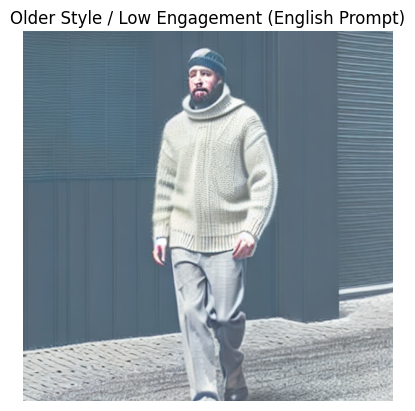


Generating image for prompt: '(sungccess style) a stylish asian man, natural light, vivid color, long hair, black pants (winter)' with vector: [0.9900000095367432, 0.9900000095367432]


  0%|          | 0/50 [00:00<?, ?it/s]

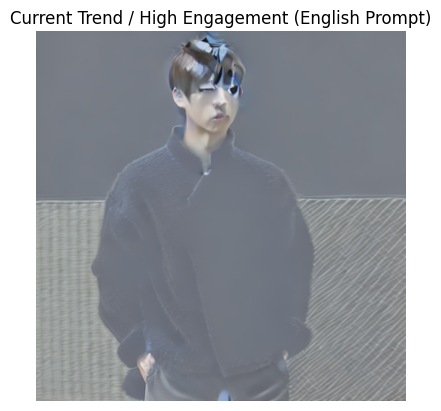


Generating image for prompt: '(sungccess style) a man with a cap, natural light, on a bench (spring)' with vector: [0.5, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]

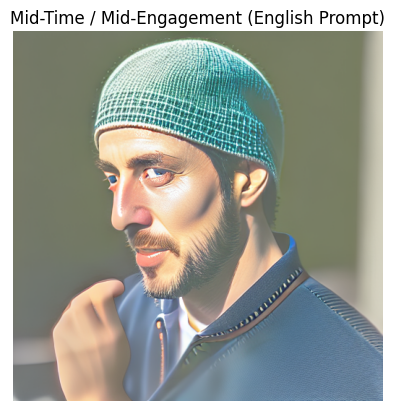


Image generation complete! Review the generated images above.


In [35]:
# In a new code cell for Step 7.2 (FIXED GENERATION CALL WITH ENGLISH PROMPTS)

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch

# Adjust parameters for image generation
NUM_INFERENCE_STEPS = 50
GUIDANCE_SCALE = 7.5

# Helper function to display images
def display_image(image, title="Generated Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Part of Step 7.2 cell, update this function definition
def generate_ec_lora_image(
    prompt: str,
    engagement_time_vector: torch.Tensor,
    seed: int = 42,
    num_inference_steps: int = NUM_INFERENCE_STEPS,
    guidance_scale: float = GUIDANCE_SCALE,
    height: int = 512,
    width: int = 512,
    output_type: str = "pil",
    # ADDED: negative_prompt parameter
    negative_prompt: str = None,
) -> Image.Image:
    generator = torch.Generator(device="cuda").manual_seed(seed)

    engagement_time_vector_batched = engagement_time_vector.unsqueeze(0).to("cuda").to(torch.float32)

    print(f"\nGenerating image for prompt: '{prompt}' with vector: {engagement_time_vector.tolist()}")
    with torch.no_grad():
        output = pipe(
            prompt=prompt,
            height=height,
            width=width,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator,
            output_type=output_type,
            # ADDED: negative_prompt to pipe call
            negative_prompt=negative_prompt,
            cross_attention_kwargs={"engagement_time_vector": engagement_time_vector_batched},
        )

    image = output.images[0]
    return image

# Example Usage: Generate some images with different engagement-time vectors
print("Starting image generation examples for a Korean man influencer (using English prompts)...\n")

# Example 1: Older Style / Low Engagement
prompt_older_low_eng = "(sungccess style) a man in a classic minimalist outfit (winter)"
vector_older_low_eng = torch.tensor([0.1, 0.1]) # Low engagement, older time within dataset
img1 = generate_ec_lora_image(prompt_older_low_eng, vector_older_low_eng, seed=42)
display_image(img1, "Older Style / Low Engagement (English Prompt)")


# Example 2: Current Trend / High Engagement
prompt_current_high_eng = "(sungccess style) a stylish asian man, natural light, vivid color, long hair, black pants (winter)"
vector_current_high_eng = torch.tensor([0.99, 0.99]) # High engagement, recent time within dataset
img2 = generate_ec_lora_image(prompt_current_high_eng, vector_current_high_eng, seed=123)
display_image(img2, "Current Trend / High Engagement (English Prompt)")


# Example 3: Mid-Time / Mid-Engagement
prompt_mid_mid_eng = "(sungccess style) a man with a cap, natural light, on a bench (spring)"
vector_mid_mid_eng = torch.tensor([0.5, 0.5]) # Mid engagement, mid time within dataset
img3 = generate_ec_lora_image(prompt_mid_mid_eng, vector_mid_mid_eng, seed=456)
display_image(img3, "Mid-Time / Mid-Engagement (English Prompt)")

print("\nImage generation complete! Review the generated images above.")

In [30]:
# In a new code cell for Step 9.1

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import torch
from tqdm.auto import tqdm

print("Starting VAE latent feature extraction for regression model training...\n")

# Move VAE to evaluation mode if it's not already (though it should be from Step 7.1)
vae.eval()

all_image_features = []
all_engagement_scores = []

# It's more efficient to iterate through the DataLoader for batching,
# but for a single pass feature extraction, iterating the dataset and batching manually works.
# Or, if train_dataloader provides pixel_values, we can use that.
# Let's use the raw dataset and batch images for VAE encoding to speed up.

BATCH_SIZE_FEATURE_EXTRACTION = 8 # Can be larger than training batch size if VAE fits
feature_extraction_dataloader = torch.utils.data.DataLoader(
    training_dataset,
    batch_size=BATCH_SIZE_FEATURE_EXTRACTION,
    shuffle=False, # No need to shuffle for feature extraction
    num_workers=NUM_WORKERS, # Reuse NUM_WORKERS from Step 3.3
    collate_fn=training_dataset.collate_fn,
    pin_memory=True
)

for batch_data in tqdm(feature_extraction_dataloader, desc="Extracting features"):
    if batch_data is None:
        continue

    pixel_values = batch_data["pixel_values"].to("cuda") # Move to GPU

    # Ensure pixel values are float32 for VAE encoding, as VAE was loaded in float32
    pixel_values_for_vae = pixel_values.to(torch.float32)

    with torch.no_grad():
        # Encode images to latent space using VAE
        # The latent features are (batch_size, 4, H_latent, W_latent)
        latents = vae.encode(pixel_values_for_vae).latent_dist.sample()

        # Flatten the latent features for the regression model
        # Resulting shape: (batch_size, 4 * H_latent * W_latent)
        flattened_latents = latents.view(latents.shape[0], -1).cpu().numpy()

    # Collect features and corresponding normalized engagement scores
    engagement_vectors = batch_data["engagement_time_vector"].cpu().numpy()
    # We are interested in normalized_engagement, which is the first element of the vector
    normalized_engagements = engagement_vectors[:, 0]

    all_image_features.append(flattened_latents)
    all_engagement_scores.append(normalized_engagements)

# Concatenate all features and scores
X = np.concatenate(all_image_features, axis=0)
y = np.concatenate(all_engagement_scores, axis=0)

print(f"\nTotal samples for regression: {len(y)}")
print(f"Feature vector dimension: {X.shape[1]}")

# Split data into training and testing sets for the regression model itself
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"Training regression model on {len(y_train)} samples, testing on {len(y_test)} samples.")

# Initialize and train the Linear Regression model
engagement_regressor = LinearRegression()
engagement_regressor.fit(X_train, y_train)

# Evaluate the regression model
y_pred = engagement_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Engagement Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
print(f"R-squared (R2) score on test set: {r2:.4f}")
print("------------------------------------------")

print("\nEngagement regression model trained successfully.")

# Now, we are ready to generate images and predict their scores.

Starting VAE latent feature extraction for regression model training...



Extracting features:   0%|          | 0/35 [00:00<?, ?it/s]


Total samples for regression: 273
Feature vector dimension: 16384
Training regression model on 218 samples, testing on 55 samples.

--- Engagement Regression Model Evaluation ---
Mean Squared Error (MSE) on test set: 0.0003
R-squared (R2) score on test set: 0.9769
------------------------------------------

Engagement regression model trained successfully.


Starting scoring of generated images using the engagement regression model...



Generating & Scoring Images:   0%|          | 0/5 [00:00<?, ?it/s]


Generating image for prompt: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)' with vector: [0.0, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]


Generating image for prompt: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)' with vector: [0.25, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]


Generating image for prompt: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)' with vector: [0.5, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]


Generating image for prompt: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)' with vector: [0.75, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]


Generating image for prompt: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)' with vector: [1.0, 0.5]


  0%|          | 0/50 [00:00<?, ?it/s]


Image generation and scoring complete.

--- Quantitative Analysis Results (Prompt Engineered) ---
Fixed Time Trend (Normalized): 0.5
Prompt Used: '(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)'

Negative Prompt Used: 'low quality, blurry, deformed, disfigured, poor lighting, plain background, grayscale, boring, low resolution'

Target Engagement: 0.00 | Predicted Engagement: 0.0668
Target Engagement: 0.25 | Predicted Engagement: 0.0767
Target Engagement: 0.50 | Predicted Engagement: 0.0827
Target Engagement: 0.75 | Predicted Engagement: 0.0809
Target Engagement: 1.00 | Predicted Engagement: 0.0549


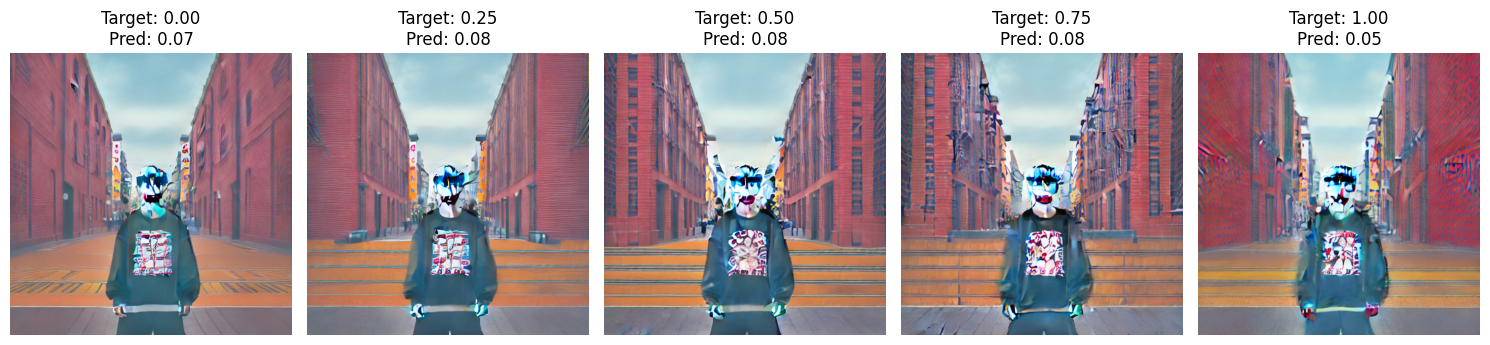


--- Interpretation ---
Ideally, as the 'Target Engagement' increases, the 'Predicted Engagement' should also consistently increase.
A strong correlation here indicates that your EC-LoRA-T model successfully learns to embed the engagement signal into the generated image's visual features.


In [31]:
# In a new code cell for Step 9.2 (PROMPT ENGINEERING FOR EVALUATION)

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
from tqdm.auto import tqdm
from torchvision import transforms

print("Starting scoring of generated images using the engagement regression model...\n")

# Move VAE to evaluation mode
vae.eval()

# Define specific target normalized_engagement values for generation
fixed_normalized_time = 0.5 # Mid-point in time trend for this evaluation

# Target engagement values - extending to extremes
target_engagement_values = [0.0, 0.25, 0.5, 0.75, 1.0]

# Enhanced and more specific English prompt
evaluation_prompt_english = "(sungccess style) a Korean man, confident and charismatic, dramatic lighting, wearing a fashionable oversized streetwear outfit, urban street scene, bokeh background, highly detailed, professional photography (summer)"

# Add a negative prompt to guide generation away from undesirable qualities
negative_prompt_english = "low quality, blurry, deformed, disfigured, poor lighting, plain background, grayscale, boring, low resolution"

generated_and_scored_images = []

for target_eng_value in tqdm(target_engagement_values, desc="Generating & Scoring Images"):
    current_engagement_vector = torch.tensor([target_eng_value, fixed_normalized_time])

    # Generate the image using your EC-LoRA-T model
    # Pass the negative_prompt to the pipe call
    generated_image_pil = generate_ec_lora_image(
        prompt=evaluation_prompt_english,
        engagement_time_vector=current_engagement_vector,
        seed=42, # Fixed seed for generation consistency
        # Add negative prompt
        negative_prompt=negative_prompt_english, # Pass negative prompt
    )

    # Convert the PIL image back to a tensor suitable for VAE input
    inference_transforms_for_vae = transforms.Compose([
        transforms.Resize(512, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ])

    generated_image_tensor = inference_transforms_for_vae(generated_image_pil).unsqueeze(0).to("cuda").to(torch.float32)

    with torch.no_grad():
        generated_latents = vae.encode(generated_image_tensor).latent_dist.sample()
        flattened_generated_latents = generated_latents.view(generated_latents.shape[0], -1).cpu().numpy()

        predicted_engagement = engagement_regressor.predict(flattened_generated_latents)[0]

    generated_and_scored_images.append({
        "target_engagement": target_eng_value,
        "predicted_engagement": predicted_engagement,
        "image": generated_image_pil,
        "prompt": evaluation_prompt_english,
        "vector_used": current_engagement_vector.tolist()
    })

print("\nImage generation and scoring complete.")

# Display results
print("\n--- Quantitative Analysis Results (Prompt Engineered) ---")
print(f"Fixed Time Trend (Normalized): {fixed_normalized_time}")
print(f"Prompt Used: '{evaluation_prompt_english}'\n")
print(f"Negative Prompt Used: '{negative_prompt_english}'\n")

plt.figure(figsize=(15, 8))
for i, result in enumerate(generated_and_scored_images):
    print(f"Target Engagement: {result['target_engagement']:.2f} | Predicted Engagement: {result['predicted_engagement']:.4f}")

    ax = plt.subplot(1, len(generated_and_scored_images), i + 1)
    plt.imshow(result['image'])
    plt.title(f"Target: {result['target_engagement']:.2f}\nPred: {result['predicted_engagement']:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n--- Interpretation ---")
print("Ideally, as the 'Target Engagement' increases, the 'Predicted Engagement' should also consistently increase.")
print("A strong correlation here indicates that your EC-LoRA-T model successfully learns to embed the engagement signal into the generated image's visual features.")